# ベクトル自己回帰（VAR）モデル

VARはARモデルの拡張版であり、VAR($p$)モデルは$y_t$を定数と自身の$p$次のラグ（$p$期の過去の値）に回帰したモデル。


## モデル

変数が$n$次元、ラグの次数が$p$だとする。（例えば時点$t$の観測値は $y_{1,t}, y_{2,t}, \dots, y_{n,t}$ となる。）

VAR($p$) では、各変数 $y_{i,t}$ は、すべての変数の過去 $p$ 期分の線形結合で表される。

:::{card} VAR($p$)

$$
y_{i,t}
=
c_{i}
+
\sum_{k=1}^{p}
\sum_{j=1}^{n}
\phi_{ij}^{(k)} \, y_{j,t-k}
+
\varepsilon_{i,t}
\quad
(i = 1,\dots,n)
$$

- $\phi_{ij}^{(k)}$：変数 $j$ の $k$ 期前」が「変数 $i$ の現在」に与える影響
- $\varepsilon_{i,t}$：変数 $i$ に対応する誤差項

:::

もう少しベクトルや行列を使って表すと、

:::{card} VAR($p$) （行列を使った表現）

$$
\mathbf{y}_t
= \mathbf{c} + \sum_{k=1}^p \boldsymbol{\Phi}_k \mathbf{y}_{t-k}+\varepsilon_t
,\quad \varepsilon_t \sim \text { W.N.} (\boldsymbol{\Sigma})
$$

- $\mathbf{c}\in\mathbb{R}^{n\times 1}$
- $\boldsymbol{\Phi}_k \in\mathbb{R}^{n\times n}$


:::


:::{card} 例：2変量VAR(1)モデル

$$
\begin{aligned}
& \left\{\begin{array}{l}
y_{1 t}=c_1+\phi_{11} y_{1, t-1}+\phi_{12} y_{2, t-1}+\varepsilon_{1 t} \\
y_{2 t}=c_2+\phi_{21} y_{1, t-1}+\phi_{22} y_{2, t-1}+\varepsilon_{2 t}
\end{array}, \quad\binom{\varepsilon_{1 t}}{\varepsilon_{2 t}} \sim\right. \text { W.N. } \\
& \mathbf{\Sigma}=\left(\begin{array}{cc}
\sigma_1^2 & \rho \sigma_1 \sigma_2 \\
\rho \sigma_1 \sigma_2 & \sigma_2^2
\end{array}\right)
\end{aligned}
$$

ここで $\rho=\operatorname{Corr}\left(\varepsilon_{1 t}, \varepsilon_{2 t}\right)$

:::

状態ベクトル $\mathbf{y}_t \in \mathbb{R}^n$ 、
ラグ $k$ の係数行列 $\boldsymbol{Phi}_k \in \mathbb{R}^{n \times n}$、
誤差ベクトル $\boldsymbol{\varepsilon}_t$ をそれぞれ

$$
\mathbf{y}_t
=
\begin{pmatrix}
y_{1,t} \\
y_{2,t} \\
\vdots \\
y_{n,t}
\end{pmatrix}
,\quad
\mathbf{\Phi}_k
=
\begin{pmatrix}
\phi_{11}^{(k)} & \phi_{12}^{(k)} & \cdots & \phi_{1n}^{(k)} \\
\phi_{21}^{(k)} & \phi_{22}^{(k)} & \cdots & \phi_{2n}^{(k)} \\
\vdots & \vdots & \ddots & \vdots \\
\phi_{n1}^{(k)} & \phi_{n2}^{(k)} & \cdots & \phi_{nn}^{(k)}
\end{pmatrix}
,\quad
\boldsymbol{\varepsilon}_t
=
\begin{pmatrix}
\varepsilon_{1,t} \\
\varepsilon_{2,t} \\
\vdots \\
\varepsilon_{n,t}
\end{pmatrix}
$$

とおくと、VAR($p$) は次のように表現できる。

:::{card} VAR($p$) （行列を使った表現）

$$
\mathbf{y}_t
=
\sum_{k=1}^{p}
\mathbf{\Phi}_k \mathbf{y}_{t-k}
+
\boldsymbol{\varepsilon}_t
$$

:::


※切片を含めた表現もされる

$$
\mathbf{y}_t
=
\mathbf{c}
+
\sum_{k=1}^{p}
\mathbf{\Phi}_k \mathbf{y}_{t-k}
+
\boldsymbol{\varepsilon}_t
$$

## パラメータ推定

VARは一見複雑だが、本質的には各変数を同じ説明変数で回帰しているだけ（多変量回帰）である。例えばVAR(1) は $\mathbf{y}_t = \mathbf{\Phi}_1 \mathbf{y}_{t-1} + \boldsymbol{\varepsilon}_t$ 。

サンプルサイズを $T$ とする（初期 $p$ 個は捨てる）。

目的変数行列を$\mathbf{Y}$、説明変数行列を$\mathbf{Z}$、係数行列をまとめたものを$\mathbf{B}$とおく。

$$
\mathbf{Y}
=
\begin{pmatrix}
\mathbf{y}_{p+1}^\top \\
\mathbf{y}_{p+2}^\top \\
\vdots \\
\mathbf{y}_T^\top
\end{pmatrix}
\in \mathbb{R}^{(T-p)\times n}
,\quad
\mathbf{Z}
=
\begin{pmatrix}
\mathbf{y}_{p}^\top & \mathbf{y}_{p-1}^\top & \cdots & \mathbf{y}_{1}^\top \\
\mathbf{y}_{p+1}^\top & \mathbf{y}_{p}^\top & \cdots & \mathbf{y}_{2}^\top \\
\vdots & \vdots & & \vdots \\
\mathbf{y}_{T-1}^\top & \mathbf{y}_{T-2}^\top & \cdots & \mathbf{y}_{T-p}^\top
\end{pmatrix}
,\quad
\mathbf{B}
=
\begin{pmatrix}
\mathbf{\Phi}_1^\top \\
\mathbf{\Phi}_2^\top \\
\vdots \\
\mathbf{\Phi}_p^\top
\end{pmatrix}
$$


VARはOLSで推定可能

$$
\hat{\mathbf{B}}
=
(\mathbf{Z}^\top \mathbf{Z})^{-1}
\mathbf{Z}^\top \mathbf{Y}
$$


## 実装

[Vector Autoregressions tsa.vector_ar - statsmodels 0.14.6](https://www.statsmodels.org/stable/vector_ar.html)

In [36]:
import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

mdata = sm.datasets.macrodata.load_pandas().data

# prepare the dates index
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]

from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)

mdata = mdata[['realgdp', 'realcons']]
mdata.index = pandas.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()

# data
display(data.tail())

# make a VAR model
model = VAR(data)
results = model.fit(2)
results.summary()

,realgdp,realcons
2008-09-30,-0.006781,-0.008948
2008-12-31,-0.013805,-0.007843
2009-03-31,-0.016612,0.001511
2009-06-30,-0.001851,-0.002196
2009-09-30,0.006862,0.007265


/home/mitama/notes/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, Dec, 2025
Time:                     23:32:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -20.0648
Nobs:                     200.000    HQIC:                  -20.1630
Log likelihood:           1465.40    FPE:                1.63813e-09
AIC:                     -20.2297    Det(Omega_mle):     1.55920e-09
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001024         0.000971            1.055           0.291
L1.realgdp         -0.096477         0.087307           -1.105           0.269
L1.realcons         0.571453         0.102953            5.551    

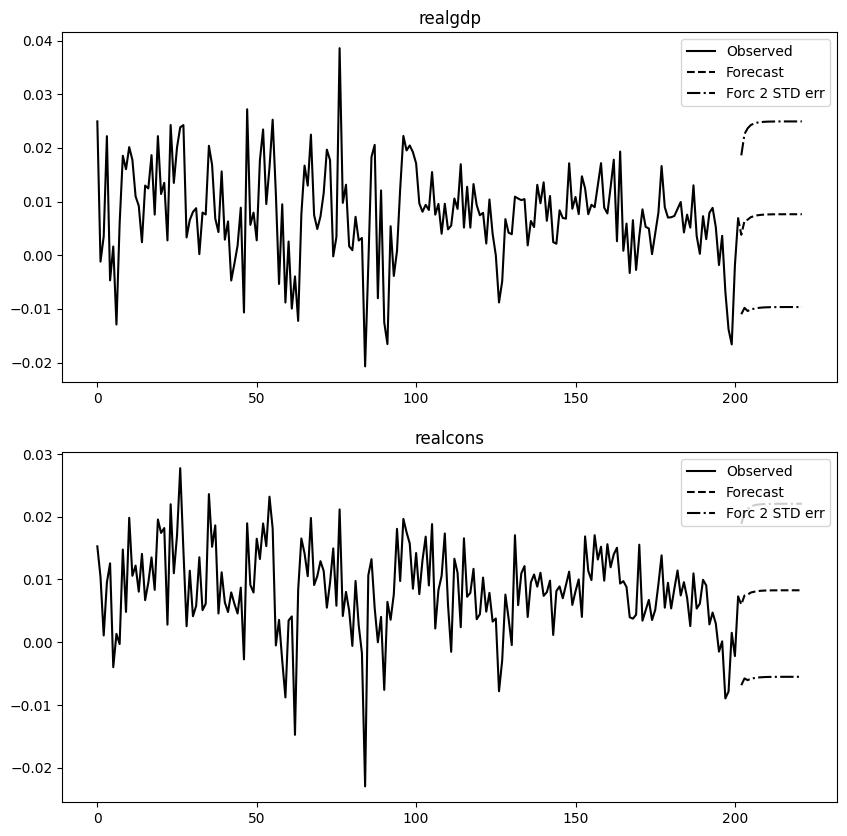

In [37]:
_ = results.plot_forecast(steps=20)